# Capstone - Optimizing Bank Marketing Campaigns with Machine Learning

### *Importing Libraries and Data*

In [1]:
### Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
### Importing the combined data set

df = pd.read_csv('Data/bank-additional-combined.csv')

### *Data Cleaning Functions (making clean_data)*

In [3]:
### Casting job, martial, education, default, housing, loan, contact, month, day_of_week, poutcome, and y to categorical variables

columns_to_categorize = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

def cast_as_columns(df):
    for column in columns_to_categorize:
        df[column] = df[column].astype('category')
    return df

### Writing a function that provides ordinal encoding for education, in order of: unknown, illiterate, basic.4y, basic.6y, basic.9y, high.school, professional.course, university.degree

def ordinal_encode_education(df):
    df['education'] = df['education'].cat.reorder_categories(['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree'])
    df['education'] = df['education'].cat.codes
    return df

### Writing a function that drops duration, as it is not known before a call is made

def drop_duration(df):
    df = df.drop('duration', axis=1)
    return df

### Writing a function that encodes the target variable, y, as 0 for no and 1 for yes

def encode_target(df):
    df['y'] = df['y'].cat.codes
    return df

### Writing a function that combines the above functions

def clean_data(df):
    df = cast_as_columns(df)
    df = ordinal_encode_education(df)
    df = drop_duration(df)
    df = encode_target(df)
    return df

### *Making one_hot_encoding function*

In [4]:
### Writing a function that one-hot encodes only the categorical variables in a dataframe, except for 'y'

def one_hot_encode(df):
    df_encoded = df.drop('y', axis=1)
    df_encoded = pd.get_dummies(df_encoded, drop_first=True)
    df_encoded['y'] = df['y']
    df = df_encoded
    return df



In [5]:
### Applying the above functions to the data set

df = clean_data(df)
df = one_hot_encode(df)

### *Trying out, well, every feature we have available in a machine learning model*

In [6]:
### Defining X and y

X = df.drop('y', axis=1)
y = df['y']

### Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE-ing the data

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

### Scaling the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Instantiating a logistic regression model

logreg = LogisticRegression(C = .1, penalty = 'l1', solver = 'liblinear', random_state = 42)

### Fitting the model

logreg.fit(X_train, y_train)

### Evaluating the model on the training data

y_train_pred = logreg.predict(X_train)
print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred))
print('Training Recall Score: ', recall_score(y_train, y_train_pred))
print('Training Precision Score: ', precision_score(y_train, y_train_pred))

### Evaluating the model on the test data

y_test_pred = logreg.predict(X_test)
print('Test Accuracy Score: ', accuracy_score(y_test, y_test_pred))
print('Test F1 Score: ', f1_score(y_test, y_test_pred))
print('Test Recall Score: ', recall_score(y_test, y_test_pred))
print('Test Precision Score: ', precision_score(y_test, y_test_pred))

Training Accuracy Score:  0.8465506525792418
Training F1 Score:  0.8434964503042596
Training Recall Score:  0.8270354257302672
Training Precision Score:  0.8606260509636529
Test Accuracy Score:  0.8169278305009932
Test F1 Score:  0.3602005399151562
Test Recall Score:  0.4551656920077973
Test Precision Score:  0.29802169751116786


In [8]:
### Training the X and y on a random forest classifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

### Evaluating the model on the training data

y_train_pred = rfc.predict(X_train)
print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred))
print('Training Recall Score: ', recall_score(y_train, y_train_pred))
print('Training Precision Score: ', precision_score(y_train, y_train_pred))

### Evaluating the model on the test data

y_test_pred = rfc.predict(X_test)
print('Test Accuracy Score: ', accuracy_score(y_test, y_test_pred))
print('Test F1 Score: ', f1_score(y_test, y_test_pred))
print('Test Recall Score: ', recall_score(y_test, y_test_pred))
print('Test Precision Score: ', precision_score(y_test, y_test_pred))


Training Accuracy Score:  0.9965351149782473
Training F1 Score:  0.996535922330097
Training Recall Score:  0.9967681789931635
Training Precision Score:  0.9963037738779313
Test Accuracy Score:  0.8941734716398146
Test F1 Score:  0.5104645227156712
Test Recall Score:  0.4873294346978557
Test Precision Score:  0.5359056806002144


In [16]:
### Performing a grid search on the random forest classifier

# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [50, 70, 90, 100],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# rfc = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = False)
# grid_search.fit(X_train, y_train)\

### results {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [50, 70, 90, 100],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=False)

In [17]:
### Printing the best parameters

print(grid_search.best_params_)


{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


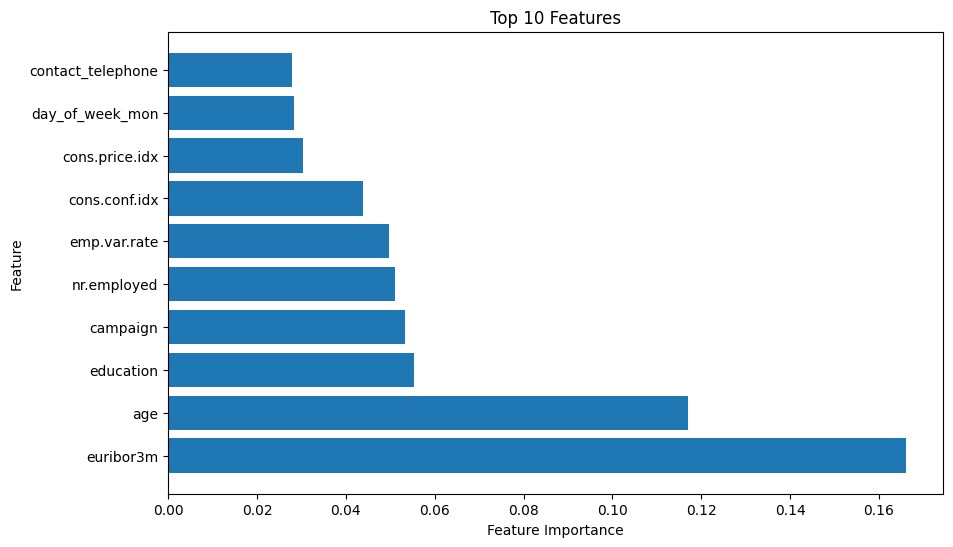

In [11]:
### Getting the top 10 features from the random forest classifier and getting features names from "X"

feature_importances = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
top_10_features = feature_importances.head(10)
top_10_features.index

### Visualizing the top 10 features

plt.figure(figsize=(10, 6))
plt.barh(top_10_features.index, top_10_features['importance'])
plt.title('Top 10 Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()